In [210]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [211]:
with Image.open("codex_reaper.jpg") as im:
    image1 = np.asarray(im)
    
with Image.open("rep_r_n.jpg") as noise:
    noise = np.asarray(noise)
with Image.open("rep_g_n.jpg") as noise_g:
    noise_g = np.asarray(noise_g)
with Image.open("rep_b_n.jpg") as noise_b:
    noise_b = np.asarray(noise_b)

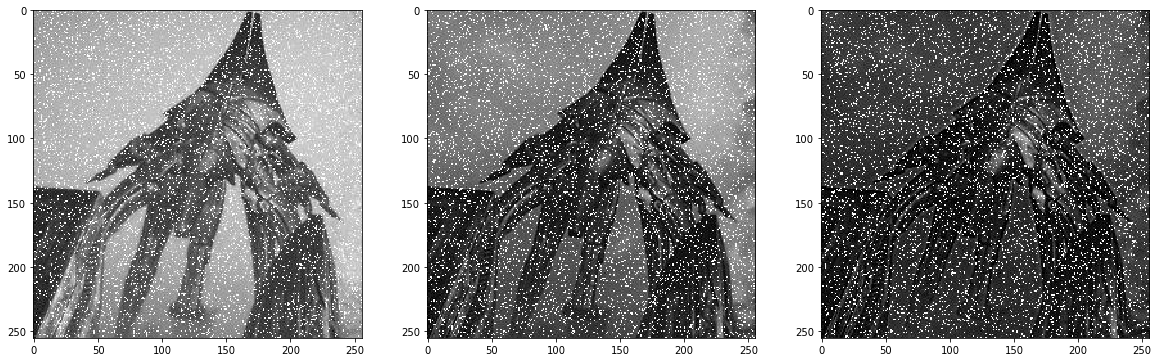

In [233]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(noise, cmap="gray")
plt.subplot(132)
plt.imshow(noise_g, cmap="gray")
plt.subplot(133)
plt.imshow(noise_b, cmap="gray")

0.009740162267386995 0.016279621771402342 0.019803434937523734

In [166]:
kernel = np.array([[1, 0, 0, 0, 1],
                  [0, 2, 0, 2, 0],
                  [0, 0, 3, 0, 0],
                  [0, 2, 0, 2, 0],
                  [1, 0, 0, 0, 1]])

In [213]:
r = image1[:,:, 0]
g = image1[:,:, 1]
b = image1[:,:, 2]

In [212]:
def rms(filter_image, original_image):
    return np.mean((((filter_image - original_image)/255)**2))

In [224]:
rm1 =rms(r, noise)
rmg= rms(g, noise_g)
rmb=rms(b, noise_b)

In [225]:
print(rm1)
print(rmg)
print(rmb)

0.4530523972619455
0.4265657092149053
0.4148780242556198


In [190]:
def rang_filter(image, kernel, rank):
    M, N  = image.shape
    X, Y = kernel.shape
    lin = kernel.flatten()
    new_image = np.ones(image.shape)*255
    for x in range(2,M-2):
        for y in range(2,N-2):
            if x+3<M and y+3<N:
                karl = image[x-2:x+3, y-2:y+3].flatten()
                s = [lin[i]*[karl[i]] for i in range(len(lin)) if lin[i]!=0]
                s_n = sorted([x for el in s for x in el ])
                #print(s_n)  #работает
                new_image[x,y]=s_n[int(rank-1)]
    #print(new_image.shape)
    return new_image
                

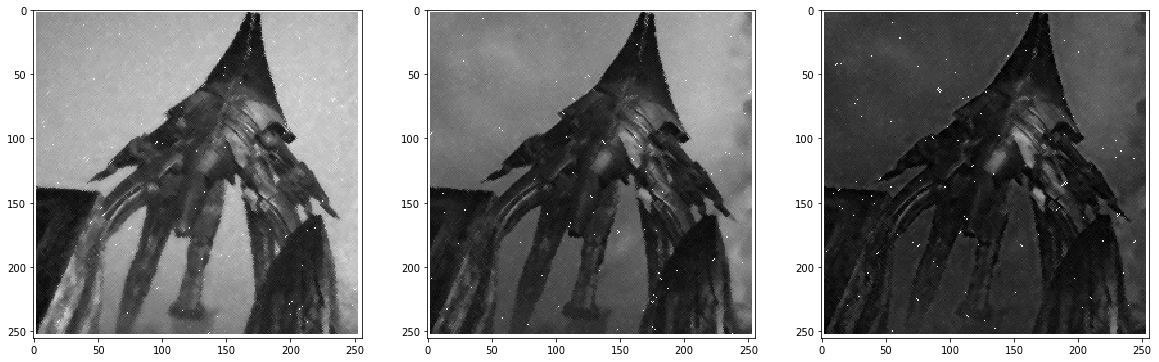

In [226]:
plt.figure(figsize=(20,20))
plt.subplot(131)
new = rang_filter(noise, kernel, 8)
plt.imshow(new, cmap="gray")
plt.subplot(132)
new_g = rang_filter(noise_g, kernel, 8)
plt.imshow(new_g, cmap="gray")
plt.subplot(133)
new_b = rang_filter(noise_b, kernel, 8)
plt.imshow(new_b, cmap="gray")
                    


In [227]:
for x, y  in zip((new, new_g, new_b), (r,g,b)):
    print(f'Ошибка {rms(x, y)}')

Ошибка 0.009033063032772851
Ошибка 0.01863346954897155
Ошибка 0.028307484557471882


In [ ]:
n = np.zeros((1121, 713, 3))
n[:, :, 0] = reaper_rn.new_im.astype("uint8")
n[:, :, 1] = reaper_gn.new_im.astype("uint8")
n[:, :, 2] = reaper_bn.new_im.astype("uint8")
Image.fromarray(n.astype(np.uint8)).save('res_re2.jpg')

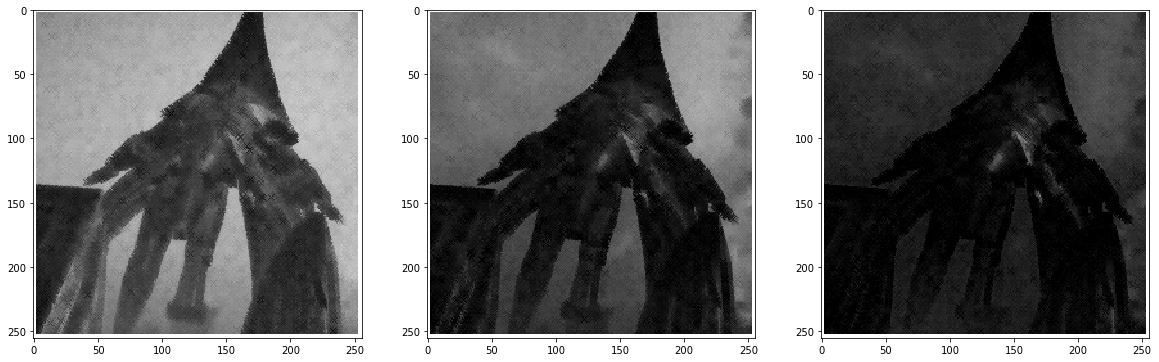

In [204]:
plt.figure(figsize=(20,20))
plt.subplot(131)
new = rang_filter(noise, kernel, 1)
plt.imshow(new, cmap="gray")
plt.subplot(132)
new_g = rang_filter(noise_g, kernel, 1)
plt.imshow(new_g, cmap="gray")
plt.subplot(133)
new_b = rang_filter(noise_b, kernel, 1)
plt.imshow(new_b, cmap="gray")

In [205]:
for x, y  in zip((new, new_g, new_b), (r,g,b)):
    print(f'Ошибка {rms(x, y)}')

Ошибка 0.02090812380980272
Ошибка 0.029034337707777656
Ошибка 0.03463906938962778


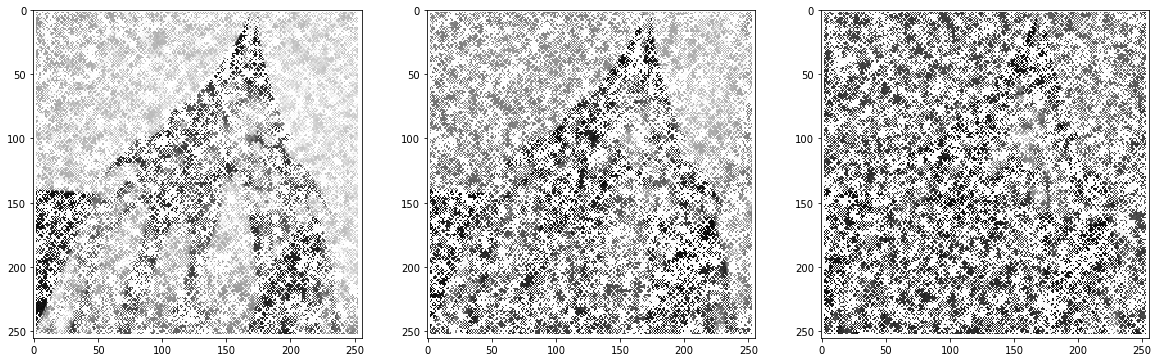

In [206]:
plt.figure(figsize=(20,20))
plt.subplot(131)
new = rang_filter(noise, kernel, 15)
plt.imshow(new, cmap="gray")
plt.subplot(132)
new_g = rang_filter(noise_g, kernel, 15)
plt.imshow(new_g, cmap="gray")
plt.subplot(133)
new_b = rang_filter(noise_b, kernel, 15)
plt.imshow(new_b, cmap="gray")

In [207]:
for x, y  in zip((new, new_g, new_b), (r,g,b)):
    print(f'Ошибка {rms(x, y)}')

Ошибка 0.13202094676814505
Ошибка 0.2829414381168751
Ошибка 0.40084089901758035


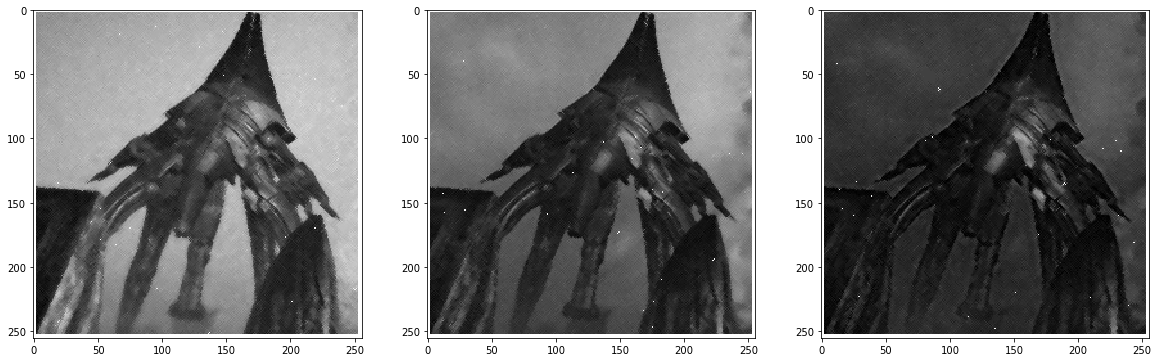

In [230]:
plt.figure(figsize=(20,20))
plt.subplot(131)
new = rang_filter(noise, kernel, 7)
plt.imshow(new, cmap="gray")
plt.subplot(132)
new_g = rang_filter(noise_g, kernel, 7)
plt.imshow(new_g, cmap="gray")
plt.subplot(133)
new_b = rang_filter(noise_b, kernel,7)
plt.imshow(new_b, cmap="gray")

In [231]:
for x, y  in zip((new, new_g, new_b), (r,g,b)):
    print(f'Ошибка {rms(x, y)}')

Ошибка 0.008669913708819924
Ошибка 0.018046845432796284
Ошибка 0.02733956225144776
